<a href="https://colab.research.google.com/github/AlteredCarbondioxide/Emergency-room-prediction-/blob/main/Liver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [2]:
from google.colab import files

uploaded = files.upload()

Saving Indian Liver Patient Dataset (ILPD).csv to Indian Liver Patient Dataset (ILPD).csv


In [3]:
import pandas as pd

df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [4]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.9 MB/s eta 0:00:00


In [5]:

# Drop rows with missing values (if any)
df = df.dropna()

# Convert 'gender' column into numerical values (Male -> 1, Female -> 0)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Split features (X) and target variable (y)
X = df.drop(columns=['is_patient'])  # All columns except target
y = df['is_patient']  # Target column

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (improves Logistic Regression performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6552
F1-score: 0.7826
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.99      0.78        73
           2       0.80      0.09      0.17        43

    accuracy                           0.66       116
   macro avg       0.72      0.54      0.47       116
weighted avg       0.70      0.66      0.55       116



In [7]:
import optuna


In [8]:
def objective(trial):
    # Define hyperparameters to tune
    C = trial.suggest_loguniform('C', 0.001, 10.0)  # Regularization strength
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])  # Optimization method

    # Train model with sampled hyperparameters
    model = LogisticRegression(C=C, solver=solver, max_iter=1000)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # Optuna maximizes this score


In [9]:
study = optuna.create_study(direction='maximize')  # We want the highest accuracy
study.optimize(objective, n_trials=20)  # Run 20 trials to find the best hyperparameters

# Print best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2025-03-12 03:52:28,329] A new study created in memory with name: no-name-cdc71da7-7c12-41b3-8df4-c7e014db5a7a
<ipython-input-8-e1811ee3bb55>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 10.0)  # Regularization strength
[I 2025-03-12 03:52:28,338] Trial 0 finished with value: 0.646551724137931 and parameters: {'C': 0.0014526036405979488, 'solver': 'liblinear'}. Best is trial 0 with value: 0.646551724137931.
<ipython-input-8-e1811ee3bb55>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 10.0)  # Regularization strength
[I 2025-03-12 03:52:28,344] Trial 1 finished with value: 0.646551

Best hyperparameters: {'C': 3.054605540844536, 'solver': 'lbfgs'}
Best accuracy: 0.6724137931034483


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1-score: {f1_rf:.4f}")


Random Forest Accuracy: 0.6552
Random Forest F1-score: 0.7619


In [11]:
def rf_objective(trial):
    # Define hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 300)  # Number of trees
    max_depth = trial.suggest_int('max_depth', 3, 20)  # Depth of each tree
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)  # Min samples to split
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)  # Min samples per leaf

    # Train model with sampled hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)  # Optuna maximizes accuracy

# Run Optuna optimization
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(rf_objective, n_trials=20)

# Print best parameters
print("Best Random Forest parameters:", study_rf.best_params)
print("Best Random Forest accuracy:", study_rf.best_value)


[I 2025-03-12 03:55:13,898] A new study created in memory with name: no-name-8fa815d6-c4ee-4bb6-b851-30f7a2ac75a1
[I 2025-03-12 03:55:14,209] Trial 0 finished with value: 0.6120689655172413 and parameters: {'n_estimators': 73, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6120689655172413.
[I 2025-03-12 03:55:15,289] Trial 1 finished with value: 0.6120689655172413 and parameters: {'n_estimators': 203, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6120689655172413.
[I 2025-03-12 03:55:15,922] Trial 2 finished with value: 0.6293103448275862 and parameters: {'n_estimators': 82, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.6293103448275862.
[I 2025-03-12 03:55:16,777] Trial 3 finished with value: 0.646551724137931 and parameters: {'n_estimators': 178, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 3 with value: 0

Best Random Forest parameters: {'n_estimators': 178, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4}
Best Random Forest accuracy: 0.646551724137931


In [13]:
# Convert target labels: Change 2 → 1, and 1 → 0
y = y.replace({2: 1, 1: 0})

# Re-split the dataset (since y changed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost F1-score: {f1_xgb:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:56:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6724
XGBoost F1-score: 0.3871


In [15]:
def xgb_objective(trial):
    # Define hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)

    # Train model with sampled hyperparameters
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)  # Optuna maximizes accuracy

# Run Optuna optimization
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(xgb_objective, n_trials=20)

# Print best parameters
print("Best XGBoost parameters:", study_xgb.best_params)
print("Best XGBoost accuracy:", study_xgb.best_value)


[I 2025-03-12 03:56:38,361] A new study created in memory with name: no-name-9331d540-fcb4-4e30-aa71-48c81b6a2f6e
<ipython-input-15-d815b3c63073>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
<ipython-input-15-d815b3c63073>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:56:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-12 03:56:39,410] Trial 0 finished with value: 0.620689655

Best XGBoost parameters: {'n_estimators': 268, 'max_depth': 4, 'learning_rate': 0.24531847889906078, 'colsample_bytree': 0.6992708287154168}
Best XGBoost accuracy: 0.6896551724137931


In [17]:
from sklearn.metrics import roc_auc_score


In [21]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Convert y_test to 1D if needed
y_test_1d = y_test.values.ravel()

# Initialize the dictionary
model_results = {}

# Logistic Regression
model_results["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test_1d, y_pred),
    "F1-score": f1_score(y_test_1d, y_pred, average='weighted'),
    "ROC-AUC": roc_auc_score(y_test_1d, log_reg.predict_proba(X_test.values)[:, 1], multi_class="ovr")  # FIXED
}

# Random Forest
model_results["Random Forest"] = {
    "Accuracy": accuracy_rf,
    "F1-score": f1_rf,
    "ROC-AUC": roc_auc_score(y_test_1d, rf.predict_proba(X_test.values)[:, 1], multi_class="ovr")  # FIXED
}

# XGBoost
model_results["XGBoost"] = {
    "Accuracy": accuracy_xgb,
    "F1-score": f1_xgb,
    "ROC-AUC": roc_auc_score(y_test_1d, xgb.predict_proba(X_test.values)[:, 1], multi_class="ovr")  # FIXED
}

# Convert results to DataFrame and display
comparison_df = pd.DataFrame(model_results).T
print(comparison_df)


                     Accuracy  F1-score   ROC-AUC
Logistic Regression  0.336207  0.187752  0.710099
Random Forest        0.655172  0.761905  0.729691
XGBoost              0.672414  0.387097  0.732080


In [23]:
!pip install catboost



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [33]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Initialize CatBoost model
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, verbose=100, random_state=42)

# Train the model
catboost.fit(X_train, y_train)

# Make predictions
y_pred_cat = catboost.predict(X_test)
y_pred_proba_cat = catboost.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy_cat = accuracy_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat, average='weighted')
roc_auc_cat = roc_auc_score(y_test, y_pred_proba_cat, multi_class="ovr")

# Store results
model_results["CatBoost"] = {
    "Accuracy": accuracy_cat,
    "F1-score": f1_cat,
    "ROC-AUC": roc_auc_cat
}

# Print the updated comparison
import pandas as pd
comparison_df = pd.DataFrame(model_results).T
print(comparison_df)


0:	learn: 0.6705589	total: 4.82ms	remaining: 4.81s
100:	learn: 0.2921344	total: 156ms	remaining: 1.39s
200:	learn: 0.1597267	total: 405ms	remaining: 1.61s
300:	learn: 0.0923738	total: 759ms	remaining: 1.76s
400:	learn: 0.0619198	total: 1.12s	remaining: 1.67s
500:	learn: 0.0454290	total: 1.52s	remaining: 1.52s
600:	learn: 0.0344377	total: 1.92s	remaining: 1.28s
700:	learn: 0.0277474	total: 2.2s	remaining: 939ms
800:	learn: 0.0226485	total: 2.53s	remaining: 628ms
900:	learn: 0.0194914	total: 2.85s	remaining: 313ms
999:	learn: 0.0162405	total: 2.99s	remaining: 0us
                     Accuracy  F1-score   ROC-AUC
Logistic Regression  0.336207  0.187752  0.710099
Random Forest        0.655172  0.761905  0.729691
XGBoost              0.672414  0.387097  0.732080
CatBoost             0.672414  0.626196  0.720930


In [25]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

# Objective function for Optuna
def objective(trial):
    # Define the hyperparameters to tune
    params = {
        "iterations": trial.suggest_int("iterations", 500, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "border_count": trial.suggest_int("border_count", 32, 255)
    }

    # Train and evaluate using cross-validation
    catboost = CatBoostClassifier(**params, verbose=0, random_state=42)
    score = cross_val_score(catboost, X_train, y_train, cv=5, scoring="accuracy").mean()
    return score  # We maximize accuracy

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train CatBoost with best parameters
best_catboost = CatBoostClassifier(**best_params, verbose=100, random_state=42)
best_catboost.fit(X_train, y_train)

# Make predictions
y_pred_cat = best_catboost.predict(X_test)
y_pred_proba_cat = best_catboost.predict_proba(X_test)[:, 1]

# Evaluate performance
accuracy_cat = accuracy_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat, average='weighted')
roc_auc_cat = roc_auc_score(y_test, y_pred_proba_cat, multi_class="ovr")

# Print results
print("Optimized CatBoost Accuracy:", accuracy_cat)
print("Optimized CatBoost F1-score:", f1_cat)
print("Optimized CatBoost ROC-AUC:", roc_auc_cat)


[I 2025-03-12 04:08:36,520] A new study created in memory with name: no-name-47d97684-a914-4c21-8a07-87ca1b852c6c
[I 2025-03-12 04:09:43,144] Trial 0 finished with value: 0.7517297802711547 and parameters: {'iterations': 1148, 'learning_rate': 0.05505895227549795, 'depth': 10, 'l2_leaf_reg': 6.352742820461072, 'border_count': 244}. Best is trial 0 with value: 0.7517297802711547.
[I 2025-03-12 04:09:50,496] Trial 1 finished with value: 0.7538101916783544 and parameters: {'iterations': 1318, 'learning_rate': 0.06445183204459129, 'depth': 5, 'l2_leaf_reg': 8.398964912547125, 'border_count': 85}. Best is trial 1 with value: 0.7538101916783544.
[I 2025-03-12 04:09:52,945] Trial 2 finished with value: 0.7385928003740064 and parameters: {'iterations': 547, 'learning_rate': 0.13334955236202745, 'depth': 5, 'l2_leaf_reg': 4.148337369527904, 'border_count': 58}. Best is trial 1 with value: 0.7538101916783544.
[I 2025-03-12 04:10:00,698] Trial 3 finished with value: 0.7257597007947639 and paramet

Best Parameters: {'iterations': 541, 'learning_rate': 0.26231415859738316, 'depth': 6, 'l2_leaf_reg': 9.031448622970453, 'border_count': 191}
0:	learn: 0.5989662	total: 1.73ms	remaining: 933ms
100:	learn: 0.0899583	total: 133ms	remaining: 578ms
200:	learn: 0.0367904	total: 266ms	remaining: 451ms
300:	learn: 0.0223185	total: 404ms	remaining: 322ms
400:	learn: 0.0164964	total: 542ms	remaining: 189ms
500:	learn: 0.0143147	total: 682ms	remaining: 54.4ms
540:	learn: 0.0139036	total: 746ms	remaining: 0us
Optimized CatBoost Accuracy: 0.6637931034482759
Optimized CatBoost F1-score: 0.6306215155895106
Optimized CatBoost ROC-AUC: 0.7253902516725071


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define model names
model_names = ["Logistic Regression", "Random Forest", "XGBoost", "CatBoost"]
model_colors = ["blue", "green", "orange", "red"]

# Dictionary to store model predictions
model_preds = {
    "Logistic Regression": log_reg.predict_proba(X_test)[:, 1],
    "Random Forest": rf.predict_proba(X_test)[:, 1],
    "XGBoost": xgb.predict_proba(X_test)[:, 1],
    "CatBoost": best_catboost.predict_proba(X_test)[:, 1]
}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


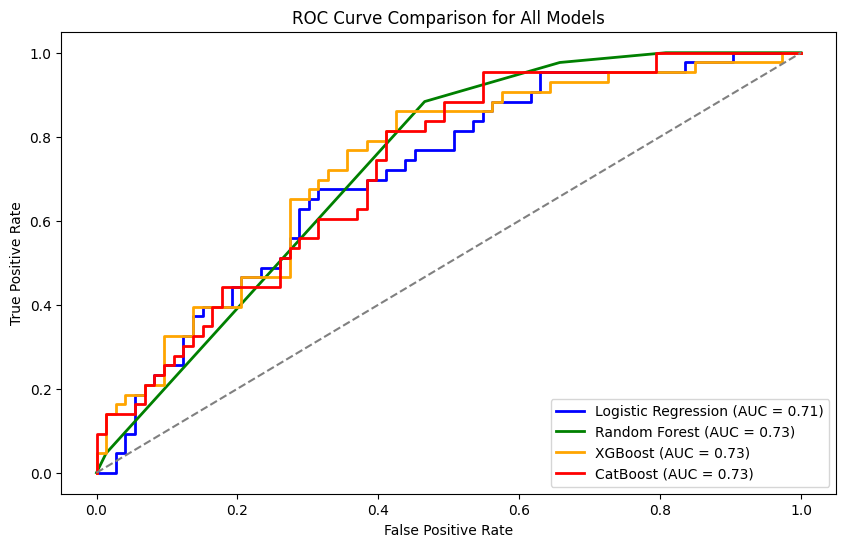

In [28]:
plt.figure(figsize=(10, 6))

for model, color in zip(model_names, model_colors):
    fpr, tpr, _ = roc_curve(y_test, model_preds[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f"{model} (AUC = {roc_auc:.2f})")

# Plot diagonal line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for All Models")
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


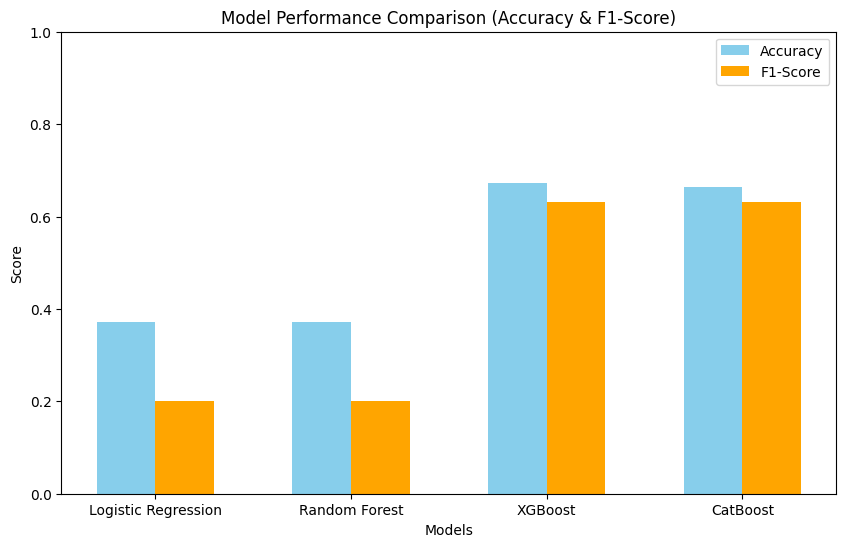

In [29]:
import numpy as np

# Performance metrics
accuracy_scores = [accuracy_score(y_test, log_reg.predict(X_test)),
                   accuracy_score(y_test, rf.predict(X_test)),
                   accuracy_score(y_test, xgb.predict(X_test)),
                   accuracy_score(y_test, best_catboost.predict(X_test))]

f1_scores = [f1_score(y_test, log_reg.predict(X_test), average='weighted'),
             f1_score(y_test, rf.predict(X_test), average='weighted'),
             f1_score(y_test, xgb.predict(X_test), average='weighted'),
             f1_score(y_test, best_catboost.predict(X_test), average='weighted')]

# Bar width
bar_width = 0.3
index = np.arange(len(model_names))

# Create bars
plt.figure(figsize=(10, 6))
plt.bar(index, accuracy_scores, bar_width, label="Accuracy", color="skyblue")
plt.bar(index + bar_width, f1_scores, bar_width, label="F1-Score", color="orange")

# Labels and legend
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison (Accuracy & F1-Score)")
plt.xticks(index + bar_width / 2, model_names)
plt.legend()
plt.ylim(0, 1)  # Set limit for better visualization

plt.show()


In [31]:
pip install tensorflow keras


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf

# Load your dataset
df = pd.read_csv("your_dataset.csv")  # Change to actual dataset path

# Separate features and target variable
X = df.drop(columns=['target_column'])  # Replace with actual target column name
y = df['target_column']

# Encode categorical labels (if needed)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to TensorFlow tensors
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)


FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'